In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random 
%matplotlib inline 

In [1]:
import matplotlib.colors as mcolors

def subsumed(G, k):
    to_be_removed = []
    for n in G:
        n_list = [] 
        for i in G[n]:
            n_list.append(i)

        for m in G:
            m_list = []
            if m != n:
                for j in G[m]:
                    m_list.append(j)

                if set(m_list).issubset(set(n_list)) and len(m_list) > k:
                    if m not in to_be_removed:
                        to_be_removed.append(m)

    for node in to_be_removed:
        G.remove_node(node)
    
    return G
    
def symmetry(G):
    to_be_merged = []
    check_dupli = []
    for n in G:
        n_list = [] 
        for i in G[n]:
            n_list.append(i)

        for m in G:
            if G.has_edge(m,n):
                break # Ze mogen niet verbonden zijn met elkaar

            m_list = []
            if m != n and len(n_list) > 3:
                for j in G[m]:
                    m_list.append(j)

            if (set(m_list).intersection(set(n_list))):
                if m not in check_dupli and n not in check_dupli:
                    check_dupli.append(m)
                    check_dupli.append(n)
                    to_be_merged.append([m, n])

    for i in range(len(to_be_merged)):
        G = nx.contracted_nodes(G, to_be_merged[i][0], to_be_merged[i][1])
    
    return G

# CHEESEMAN ZEGT K-1 MAAR DAT DOE IK NIET. WAAROM K-1?


def undercon(G, k):
    to_be_removed = []
    for n in G:
        if len(G[n]) < k:
            to_be_removed.append(n)

    for node in to_be_removed:       
        G.remove_node(node) # G.remove_node(n)
    
    return G
    

def gen_random_graph(N, K):
    
    G = nx.Graph()
    G.add_nodes_from(range(N))
    
    Somenodes = random.randrange(N)
    flag = 0
    
    for i in G:
        flag = 0
        for j in nx.cliques_containing_node(G, nodes=i):
            if len(j) > K:
                flag = 1
                break
        if flag == 1:
            continue
        rnum = random.randrange(200)
        for count in range(rnum):
            flag = 0
            randomnode = random.randrange(N)
            if randomnode!= i:
                for a in nx.cliques_containing_node(G, nodes=randomnode):
                    if len(a) > K:
                        flag = 1
                        break
                if flag == 1:
                    continue
                
                ran = random.random()
                if ran > 0.5:
                    G.add_edge(i,randomnode)
                    
                    
    nx.draw(G,with_labels = True)
    print(nx.number_of_nodes(G))
    plt.show()
    
    G = subsumed(G, K)
    nx.draw(G,with_labels = True)
    print(nx.number_of_nodes(G))
    plt.show()
    
    G = symmetry(G)
    nx.draw(G,with_labels = True)
    print(nx.number_of_nodes(G))
    plt.show()
    
    G = undercon(G, K)
    nx.draw(G,with_labels = True)
    print(nx.number_of_nodes(G))
    plt.show()

    return G

G = gen_random_graph(10, 3)
#print(nx.average_node_connectivity(G)) # Average connectivity

NameError: name 'nx' is not defined

In [171]:
print(nx.node_clique_number(G))
print(nx.average_node_connectivity(G)) # Average connectivity

{0: 5, 1: 5, 4: 5, 5: 5, 6: 5, 7: 5, 8: 5, 9: 5, 10: 5, 12: 5, 13: 4, 15: 5, 16: 4, 17: 5, 18: 5, 19: 5, 20: 5, 22: 4, 23: 5, 25: 5, 26: 5, 27: 4, 29: 5, 30: 4, 31: 5, 32: 5, 33: 4, 34: 4, 35: 4, 36: 4, 37: 5, 38: 4, 40: 4, 41: 4, 42: 4, 43: 5, 44: 4, 46: 4, 47: 5, 48: 5, 49: 4, 50: 5, 51: 4, 52: 4, 53: 4, 54: 4, 55: 4, 56: 5, 57: 4, 58: 4, 59: 4, 60: 4, 61: 4, 62: 4, 63: 4, 64: 4, 65: 4, 66: 4, 67: 4, 68: 4, 69: 4, 70: 4, 71: 5, 72: 4, 73: 4, 74: 4, 75: 4, 76: 4, 77: 4, 78: 4, 79: 4, 80: 4, 81: 4, 83: 4, 84: 4, 85: 4, 87: 4, 88: 4, 89: 5, 91: 5, 92: 3, 93: 5, 94: 4, 95: 5, 96: 4, 97: 4, 98: 4, 99: 5}
7.789184952978056


In [140]:
# nx.algorithms.coloring.strategy_saturation_largest_first(G, 
max_nu = 0
for i in nx.cliques_containing_node(G, nodes=1):
    if len(i) > max_nu:
        max_nu = len(i)

print(max_nu)

6


In [102]:
def my_range(n):
    i = 0
    
    while i < n:
        yield i
        i += 1

g = my_range(100)

next(g)
next(g)
next(g)

2

In [91]:
colordict = nx.greedy_color(G, nx.algorithms.coloring.strategy_saturation_largest_first(G, 4))
import matplotlib.colors as mcolors

avail_colors = []
for i in mcolors.CSS4_COLORS:
    avail_colors.append(i)

    
print(colordict)
color_map = []

for i in colordict:
    color_map.append(colordict[i])    

nx.draw(G, node_color=color_map)
plt.show()

AttributeError: module 'networkx' has no attribute 'saturation_largest_first'

100


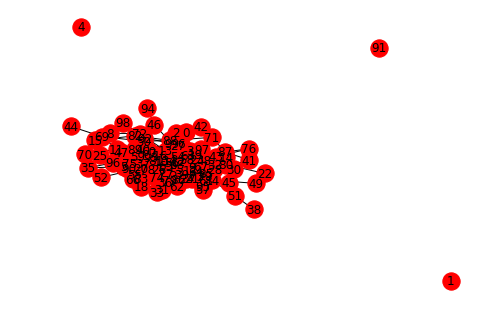

100


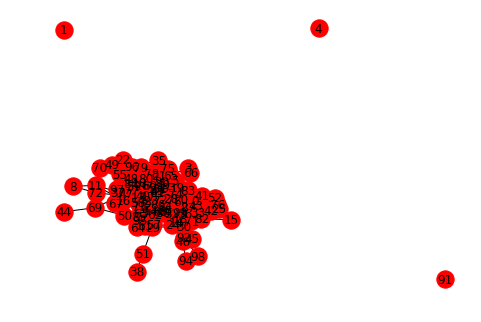

71


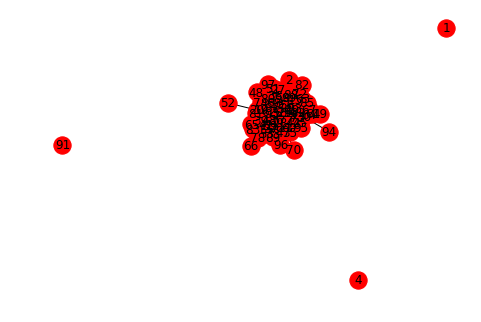

55


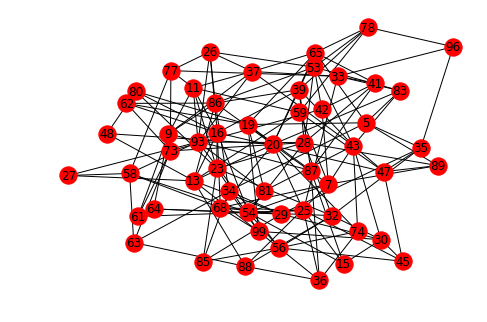

{5: 3, 7: 3, 9: 3, 11: 3, 13: 3, 15: 3, 16: 3, 19: 3, 20: 3, 23: 3, 25: 3, 26: 3, 27: 2, 28: 3, 29: 3, 30: 2, 32: 3, 33: 2, 34: 3, 35: 2, 36: 3, 37: 3, 39: 3, 41: 2, 42: 2, 43: 3, 45: 2, 47: 2, 48: 3, 53: 3, 54: 3, 56: 3, 58: 3, 59: 2, 61: 3, 62: 2, 63: 2, 64: 3, 65: 3, 68: 3, 73: 2, 74: 3, 77: 2, 78: 3, 80: 3, 81: 2, 83: 3, 85: 3, 86: 3, 87: 2, 88: 2, 89: 2, 93: 3, 96: 2, 99: 2}
4.92996632996633


In [126]:
G = nx.gnm_random_graph(100, 200)
nx.draw(G,with_labels = True)
print(nx.number_of_nodes(G))
plt.show()

G = subsumed(G, 4)
nx.draw(G,with_labels = True)
print(nx.number_of_nodes(G))
plt.show()

G = symmetry(G)
nx.draw(G,with_labels = True)
print(nx.number_of_nodes(G))
plt.show()

G = undercon(G, 4)
nx.draw(G,with_labels = True)
print(nx.number_of_nodes(G))
plt.show()

print(nx.node_clique_number(G))
print(nx.average_node_connectivity(G)) # Average connectivity

500


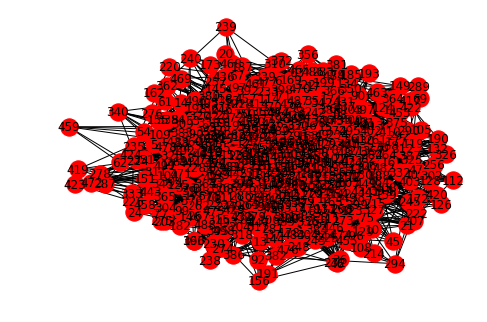

500


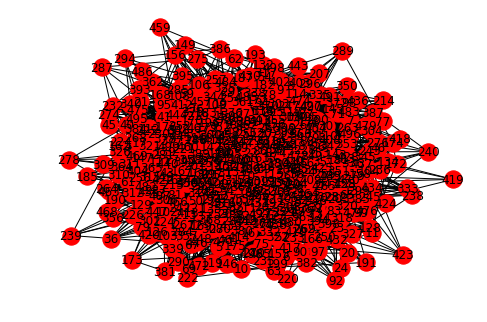

445


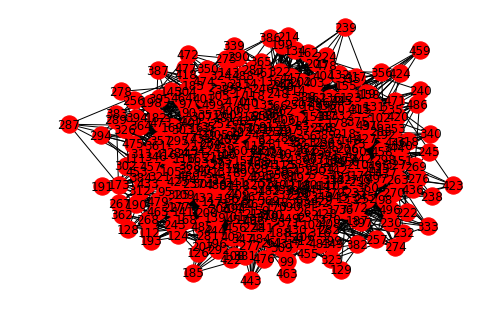

445


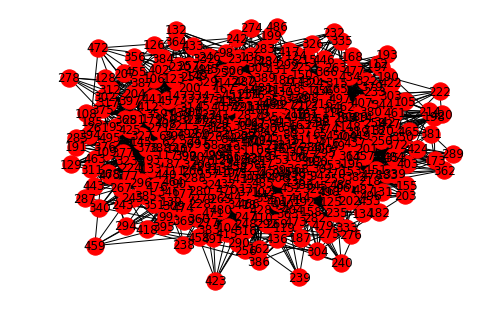

In [18]:
def gen_random_graph(N, K):
    
    G = nx.Graph()
    G.add_nodes_from(range(N))
    
    Somenodes = random.randrange(N)
    flag = 0
    
    for i in G:  
        rnum = random.randrange(50)
        for count in range(rnum):
            randomnode = random.randrange(N)
            if randomnode!= i:
                ran = random.random()
                if ran > 0.5:
                    G.add_edge(i,randomnode)
                    for j in nx.cliques_containing_node(G, randomnode):
                        if i in j and len(j) > K-1:
                            G.remove_edge(i,randomnode)
                            break
                    
    nx.draw(G,with_labels = True)
    print(nx.number_of_nodes(G))
    plt.show()
    
    G = subsumed(G, K)
    nx.draw(G,with_labels = True)
    print(nx.number_of_nodes(G))
    plt.show()
    
    G = symmetry(G)
    nx.draw(G,with_labels = True)
    print(nx.number_of_nodes(G))
    plt.show()
    
    G = undercon(G, K)
    nx.draw(G,with_labels = True)
    print(nx.number_of_nodes(G))
    plt.show()

    return G

G = gen_random_graph(500, 3)

In [19]:
print(nx.node_clique_number(G))
print(nx.average_node_connectivity(G)) # Average connectivity

{1: 4, 3: 3, 5: 3, 7: 3, 9: 3, 11: 3, 12: 3, 13: 3, 14: 3, 15: 4, 17: 3, 18: 3, 22: 4, 25: 4, 26: 4, 27: 3, 28: 3, 29: 4, 30: 3, 31: 4, 32: 4, 33: 3, 35: 3, 36: 3, 38: 4, 39: 3, 40: 3, 42: 3, 45: 3, 47: 3, 48: 4, 49: 3, 51: 3, 52: 3, 53: 3, 56: 3, 57: 4, 58: 3, 60: 3, 62: 3, 64: 3, 65: 3, 68: 4, 69: 3, 70: 3, 71: 3, 73: 3, 74: 4, 76: 3, 77: 3, 79: 3, 80: 3, 81: 3, 83: 3, 84: 3, 86: 3, 87: 3, 88: 3, 89: 4, 90: 3, 91: 3, 93: 3, 94: 3, 95: 3, 96: 3, 97: 3, 98: 2, 99: 3, 100: 3, 101: 4, 102: 3, 104: 3, 105: 4, 106: 3, 107: 3, 108: 2, 109: 3, 110: 3, 111: 3, 112: 2, 113: 3, 114: 3, 115: 3, 116: 3, 117: 3, 118: 3, 119: 3, 120: 3, 121: 3, 122: 3, 123: 3, 124: 3, 125: 3, 126: 3, 127: 3, 128: 3, 129: 2, 130: 2, 131: 3, 132: 2, 133: 3, 134: 3, 135: 3, 136: 3, 137: 3, 138: 3, 139: 3, 140: 3, 141: 3, 142: 3, 143: 3, 145: 2, 147: 3, 148: 3, 149: 2, 150: 3, 151: 3, 152: 3, 153: 3, 154: 3, 155: 3, 157: 3, 158: 2, 159: 3, 160: 3, 161: 3, 162: 3, 163: 2, 164: 3, 165: 3, 167: 3, 168: 3, 169: 3, 170: 3, 

In [20]:
tempdic = nx.node_clique_number(G)
maxnu = 0
for a in tempdic:
    if tempdic[a] > maxnu: 
        maxnu = tempdic[a]

print(maxnu)

4


In [215]:
# TO WRITE GRAPHS TO SAVE GRAPHS

from networkx.readwrite import json_graph
import json

data = json_graph.node_link_data(G)
with open('data.json', 'w') as f:
    json.dump(data, f)

In [12]:
# THIS WORKSSSSSSSSS
nx.write_edgelist(G, "G1.edgelist")

In [258]:
# TO ACCESS THE GRAPHS
G=nx.read_edgelist("test.edgelist", nodetype=int)

85


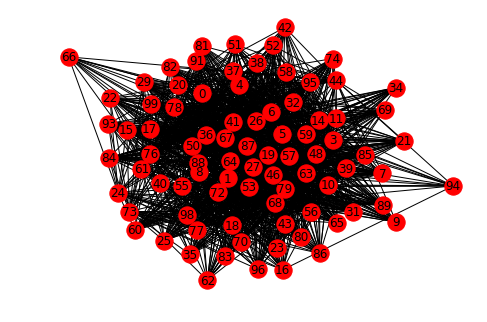

In [261]:
nx.draw(G,with_labels = True)
print(nx.number_of_nodes(G))
plt.show()